In [14]:
import functools

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
from matplotlib import rc


import optuna

from sklearn import datasets
import sklearn.datasets
import sklearn.metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import functools
import xgboost as xgb
import psutil
import time

In [9]:
df = pd.read_csv('../data/dataset/DTX_data_002.csv')
df2 = pd.read_csv('../data/dataset/DTX_data_003.csv')

In [10]:
df = pd.concat([df,df2['흡연기간연도'],df2['청소년흡연경험'],df2['의존도판정']],axis=1)

In [12]:
df.head()

,금연성공여부,연령,흡연시작연령,하루흡연량,담배종류_1,담배종류_2,담배종류_4,담배종류_5,담배종류_6,담배종류_7,...,FTND_4,FTND_5,FTND_6,FTND_7,FTND_8,FTND_9,FTND_10,흡연기간연도,청소년흡연경험,의존도판정
0,0,52,25,3,1,0,0,0,0,0,...,0,0,0,0,1,0,0,27,0,3
1,0,32,17,4,1,0,0,0,0,0,...,0,0,0,1,0,0,0,15,1,3
2,1,41,21,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,20,0,1
3,1,60,18,2,1,0,0,0,0,0,...,0,0,1,0,0,0,0,42,1,2
4,1,28,19,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,9,1,1


0    674
1    381
Name: 금연성공여부, dtype: int64


/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


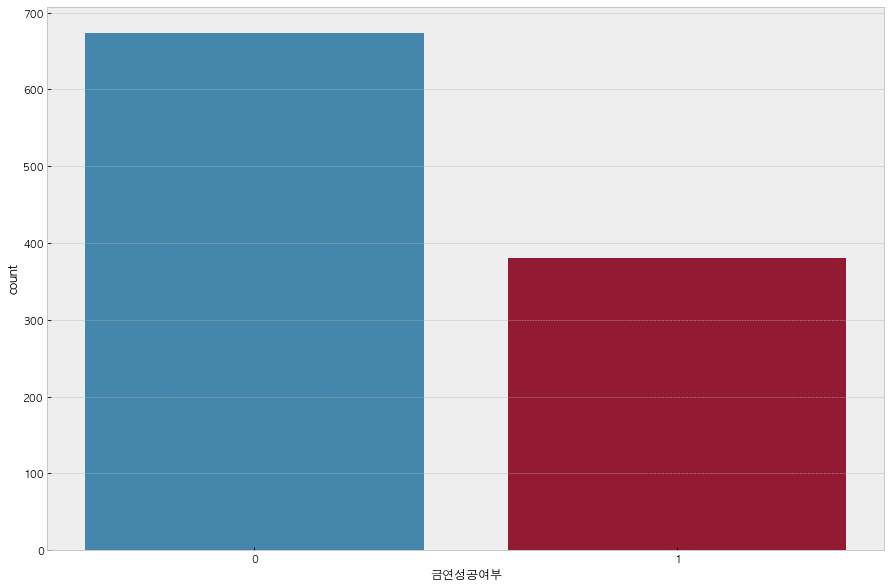

In [17]:
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(15,10))
sns.countplot(df.금연성공여부)
plt.plot()

print(df['금연성공여부'].value_counts(ascending=False))


In [18]:
def outlier_function(df, col_name):
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
    
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
    
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count += 1
    return lower_limit, upper_limit, outlier_count

In [19]:
for col in  df.columns[:10]:
    out=outlier_function(df,col)
    if out[2]>0:
        print(f"There are {out[2]} outliers in {col}")

There are 19 outliers in 흡연시작연령
There are 165 outliers in 담배종류_2
There are 184 outliers in 담배종류_4
There are 81 outliers in 담배종류_5
There are 11 outliers in 담배종류_6
There are 44 outliers in 담배종류_7


[]

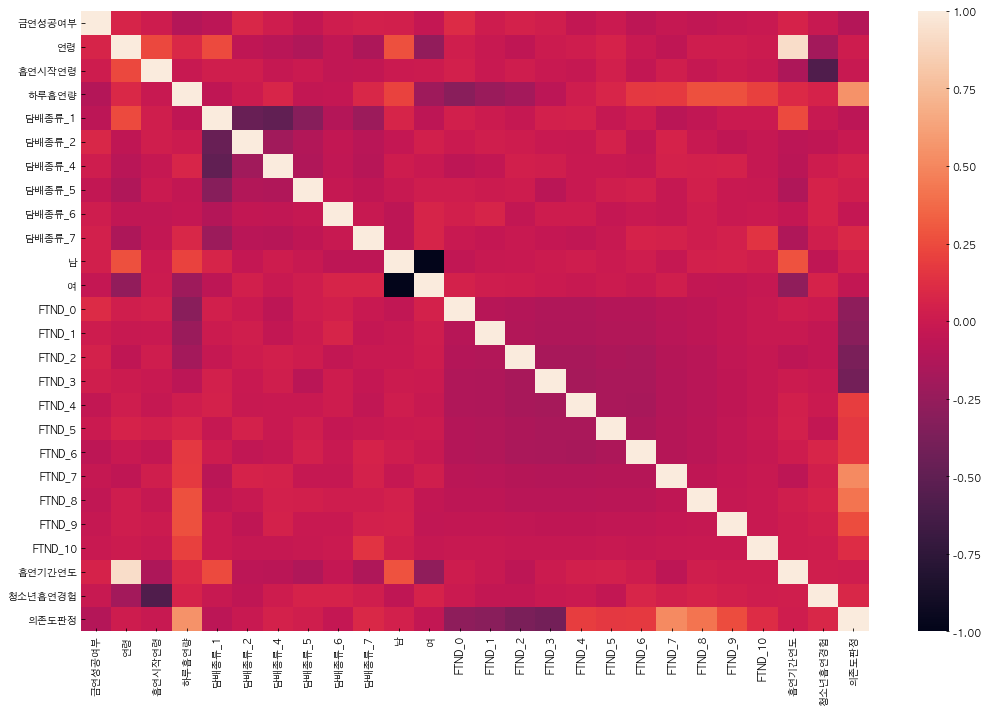

In [21]:
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15,10))
sns.heatmap(df.corr())
plt.tight_layout()
plt.plot()

In [31]:
df.to_csv('../data/dataset/train.csv',index=False)

In [26]:
from autoxgb import AutoXGB

In [34]:
train_filename="../data/dataset/train.csv"
output="submission_4"
test_filename= None
idx= None
targets=["금연성공여부"]
use_gpu= False
num_folds=5
seed=42
num_trials=5
time_limit=600

In [35]:
axgb=AutoXGB(
    train_filename=train_filename,
    output=output,
    test_filename=test_filename,
    idx=idx,
    targets=targets,
    use_gpu=use_gpu,
    num_folds=num_folds,
    num_trials=num_trials,
    time_limit=time_limit
)

2022-05-25 10:45:26,350 INFO Output directory: submission_4
2022-05-25 10:45:26,351 WARNING No id column specified. Will default to `id`.


In [39]:
axgb.train()

2022-05-25 10:47:15,461 INFO Reading training data
2022-05-25 10:47:15,484 INFO Mem. usage decreased to 0.03 Mb (87.4% reduction)
2022-05-25 10:47:15,486 INFO Problem type: binary_classification
2022-05-25 10:47:15,487 INFO Creating folds
2022-05-25 10:47:15,493 INFO Encoding target(s)
2022-05-25 10:47:15,496 INFO Found 0 categorical features.
2022-05-25 10:47:16,424 INFO Model config: train_filename='../data/dataset/train.csv' test_filename=None idx='id' targets=['금연성공여부'] problem_type=<ProblemType.binary_classification: 1> output='submission_4' features=['연령', '흡연시작연령', '하루흡연량', '담배종류_1', '담배종류_2', '담배종류_4', '담배종류_5', '담배종류_6', '담배종류_7', '남', '여', 'FTND_0', 'FTND_1', 'FTND_2', 'FTND_3', 'FTND_4', 'FTND_5', 'FTND_6', 'FTND_7', 'FTND_8', 'FTND_9', 'FTND_10', '흡연기간연도', '청소년흡연경험', '의존도판정'] num_folds=5 use_gpu=False seed=42 categorical_features=[] num_trials=5 time_limit=600 fast=False
2022-05-25 10:47:16,425 INFO Saving model config
2022-05-25 10:47:16,426 INFO Saving encoders
[I 2022-05

[10:47:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:627: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  if metric in warn_for and "f-score" in warn_for:
/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10:47:18] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:627: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  if metric in warn_for and "f-score" in warn_for:
/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10:47:18] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:627: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  if metric in warn_for and "f-score" in warn_for:
/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  if metric in warn_for and "f-score" in warn_for:
/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/xgb

[10:47:20] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:627: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:47:20] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:627: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  if metric in warn_for and "f-score" in warn_for:
2022-05-25 10:47:22,662 INFO Metrics: {'auc': 0.561003868407639, 'logloss': 0.6506571779318896, 'f1': 0.0, 'accuracy': 0.6388625592417061, 'precision': 0.0, 'recall': 0.0}
[I 2022-05-25 10:47:22,674] Trial 0 finished with value: 0.6506571779318896 and parameters: {'learning_rate': 0.01179947645627308, 'reg_lambda': 2.798031364723739, 'reg_alpha': 0.00041092671911941125, 'subsample': 0.8943400672622555, 'colsample_bytree': 0.7601420231245677, 'max_depth': 3, 'early_stopping_rounds': 274, 'n_estimators': 7000, 'tree_method': 'approx', 'booster': 'gblinear'}. Best is trial 0 with value: 0.6506571779318896.
/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/

[10:47:22] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:627: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10:47:23] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:627: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10:47:23] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:627: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10:47:26] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:627: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:47:26] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:627: 
Parameters: { "colsample_bytree", "max_depth", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




2022-05-25 10:47:28,446 INFO Metrics: {'auc': 0.6052847896917025, 'logloss': 0.6399274424354047, 'f1': 0.04533389529067207, 'accuracy': 0.6417061611374407, 'precision': 0.7666666666666666, 'recall': 0.02361585782638414}
[I 2022-05-25 10:47:28,456] Trial 1 finished with value: 0.6399274424354047 and parameters: {'learning_rate': 0.017366787369293278, 'reg_lambda': 0.006483581463337911, 'reg_alpha': 0.006462657070779505, 'subsample': 0.960289400845829, 'colsample_bytree': 0.2102064853119719, 'max_depth': 7, 'early_stopping_rounds': 395, 'n_estimators': 7000, 'tree_method': 'hist', 'booster': 'gblinear'}. Best is trial 1 with value: 0.6399274424354047.
/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/pytho

2022-05-25 10:47:40,272 INFO Fold 1 done!
2022-05-25 10:47:40,272 INFO Training and predicting for fold 2
/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
2022-05-25 10:47:40,620 INFO Fold 2 done!
2022-05-25 10:47:40,620 INFO Training and predicting for fold 3
/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
2022-05-25 10:47:40,997 INFO Fold 3 done!
2022-05-25 10:47:40,997 INFO Training and predicting for fold 4
/Users/aidev_yyc_mac/miniforge3/envs/mario/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWar

In [38]:
!pip3 install pyarrow

     |████████████████████████████████| 16.2 MB 7.4 MB/s eta 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autoxgb 0.2.2 requires fastapi==0.70.0, which is not installed.
autoxgb 0.2.2 requires loguru==0.5.3, which is not installed.
autoxgb 0.2.2 requires uvicorn==0.15.0, which is not installed.
autoxgb 0.2.2 requires numpy==1.21.3, but you have numpy 1.22.4 which is incompatible.
autoxgb 0.2.2 requires pandas==1.3.4, but you have pandas 1.4.2 which is incompatible.
autoxgb 0.2.2 requires pyarrow==6.0.0, but you have pyarrow 8.0.0 which is incompatible.
autoxgb 0.2.2 requires pydantic==1.8.2, but you have pydantic 1.9.1 which is incompatible.
autoxgb 0.2.2 requires scikit-learn==1.0.1, but you have scikit-learn 1.1.1 which is incompatible.
autoxgb 0.2.2 requires xgboost==1.5.0, but you have xgboost 1.6.1 which is incompatible.
